<a href="https://colab.research.google.com/github/MaiteVillalon/ADA-informes/blob/main/Codigo_Huffman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Descripción del problema**
huffman.svg

En el siguiente informe analizaremos el algoritmo código Huffman. El  algoritmo creado por David A. Huffman se utiliza para la compresion de datos, hace uso de una tabla de codigos de longitud variable para codificar un determinado símbolo. La tabla se llena de una forma específica, basandose en la probabilidad de aparición de cada posible valor de dicho símbolo.

El algoritmo recibe por entrada un diccionario con las frecuencias de cada caracter, y entrega por salida la raíz del montículo (que también corresponde a la raíz del árbol de decodificación final).



Entrada: F=[a:30,b:40,c:20,d:10]

Salida: BCDA 39

##**Descripción del Algoritmo**

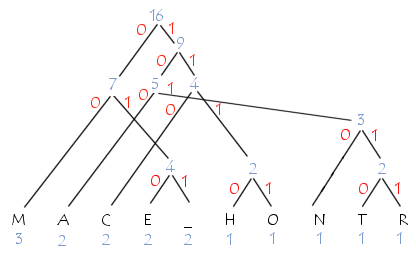

Como mencionamos anteriormente, La tabla recibe un diccionario de frecuencias, y retorna la raiz del montículo construido, los pasos más importantes a seguir son los siguientes:



*   Insertar en un monticulo de minimos ordenados por su frecuencia los caracteres recibidos. 
*  Se elimina dos veces la raiz del monticulo y se guardan estos elementos en dos nodos **w** e **y**.
*   Se crea un nodo padre para x e y concatenando sus claves y sumando sus frecuencias.
*  Se inserta este nodo en el montículo.

*    Se repite desde el paso 2 hasta que el montículo tenga un solo elemento.


*   Se retorna la raiz del montículo.


***Ejemplo paso a paso:***


Para este ejemplo recibiremos el siguiente diccionario.

F = { a : 20, b : 50, c : 10, d : 40 }


Insertamos los nodos en un montículo de mínimos, obteniendo lo siguiente:

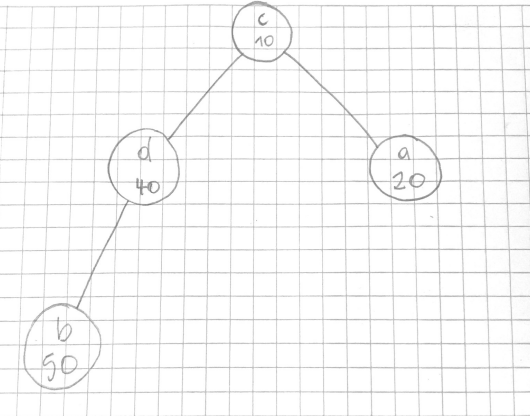


Eliminamos del montículo los dos elementos menores y los guardaremos en los nodos x e y:

X = { c : 10 }

Y = { a : 20 }

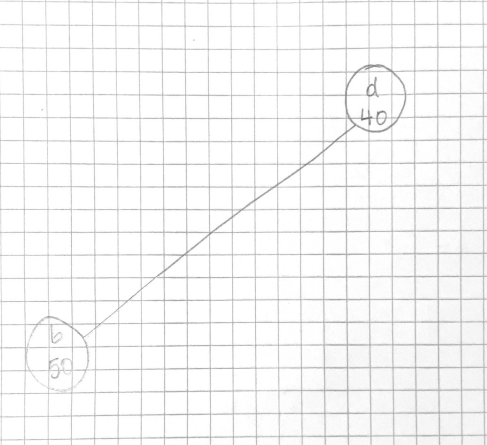


Se crea un nodo padre de X e Y, concatenando sus claves y sumando su frecuencias

{ CA : (10 + 20) }


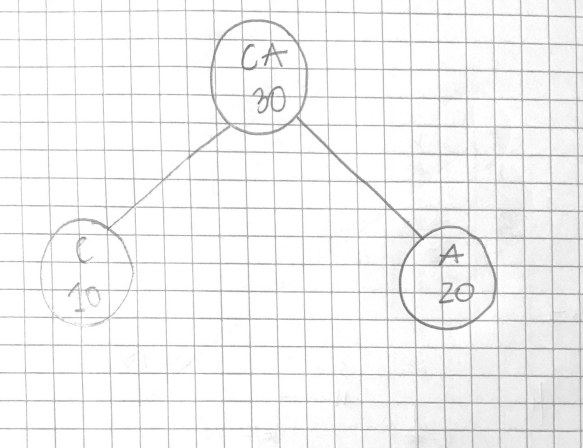

Eliminamos del montículo los dos elementos menores y los guardaremos en los nodos x e y:

X = { CA : 30 }

Y = { d : 40 }

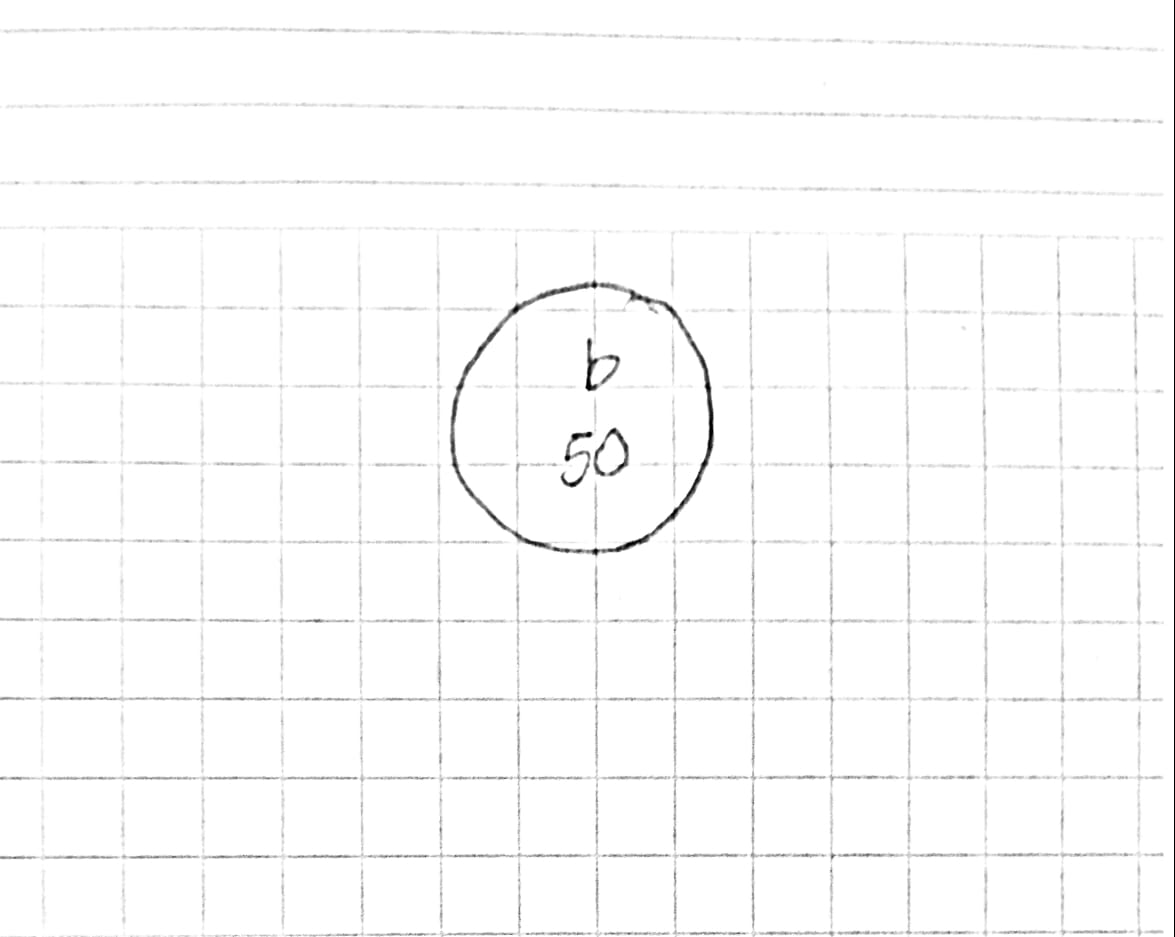


Se crea un nodo padre de X e Y, concatenando sus claves y sumando su frecuencias

{ CAD: 70 } 

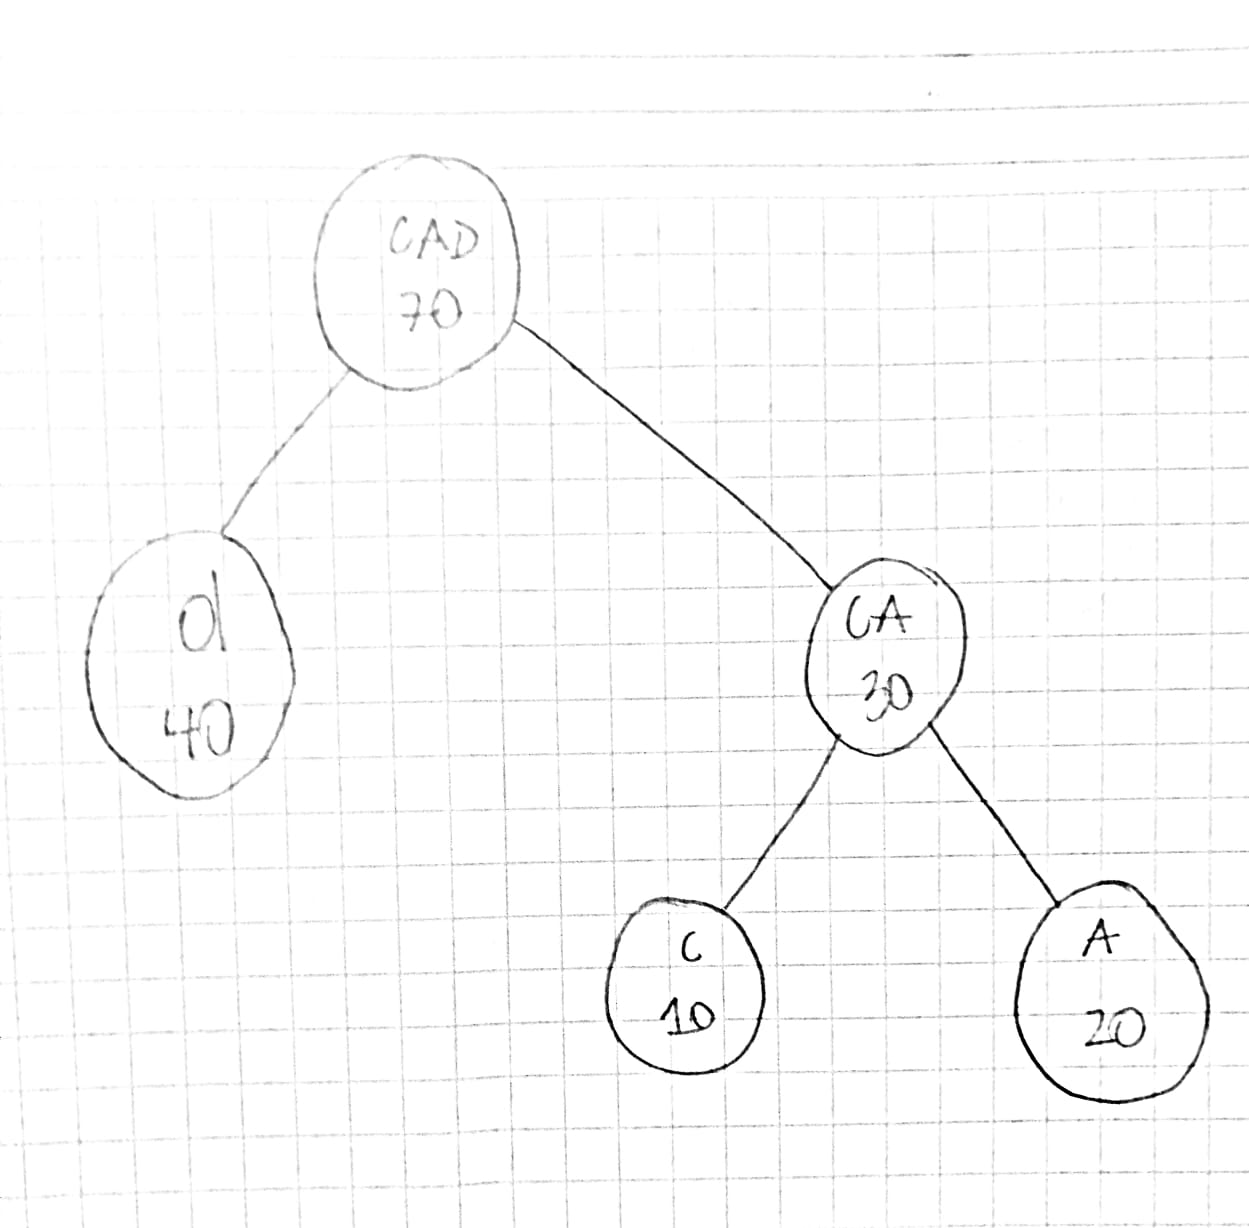


Insertamos el nodo CAD : 70 en el monticulo.

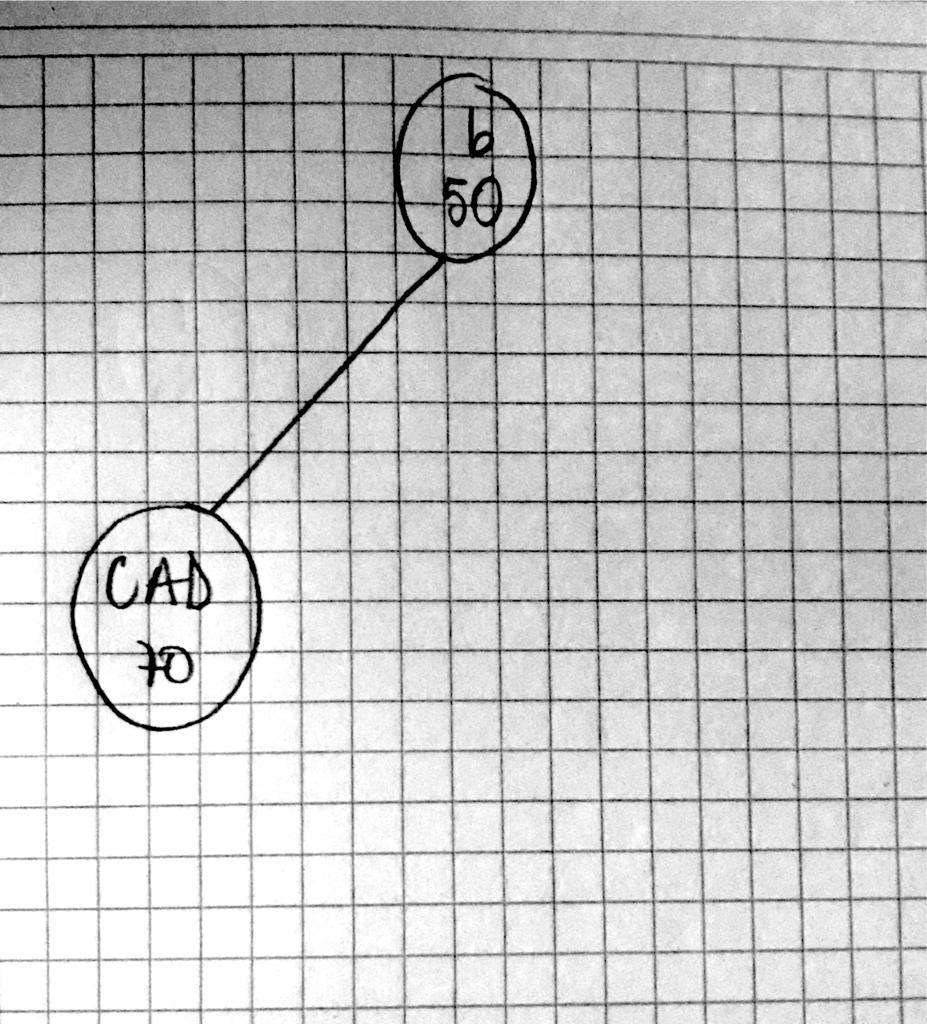


Eiminamos los dos elementos menores del monticulo y los guardamos en los nodos x e y 

X = { B : 50 }

Y = { CAD : 70 }

Creamos un nuevo nodo padre de x e y con clave BCAD y frecuencia 120, lo insertamos en el monticulo.

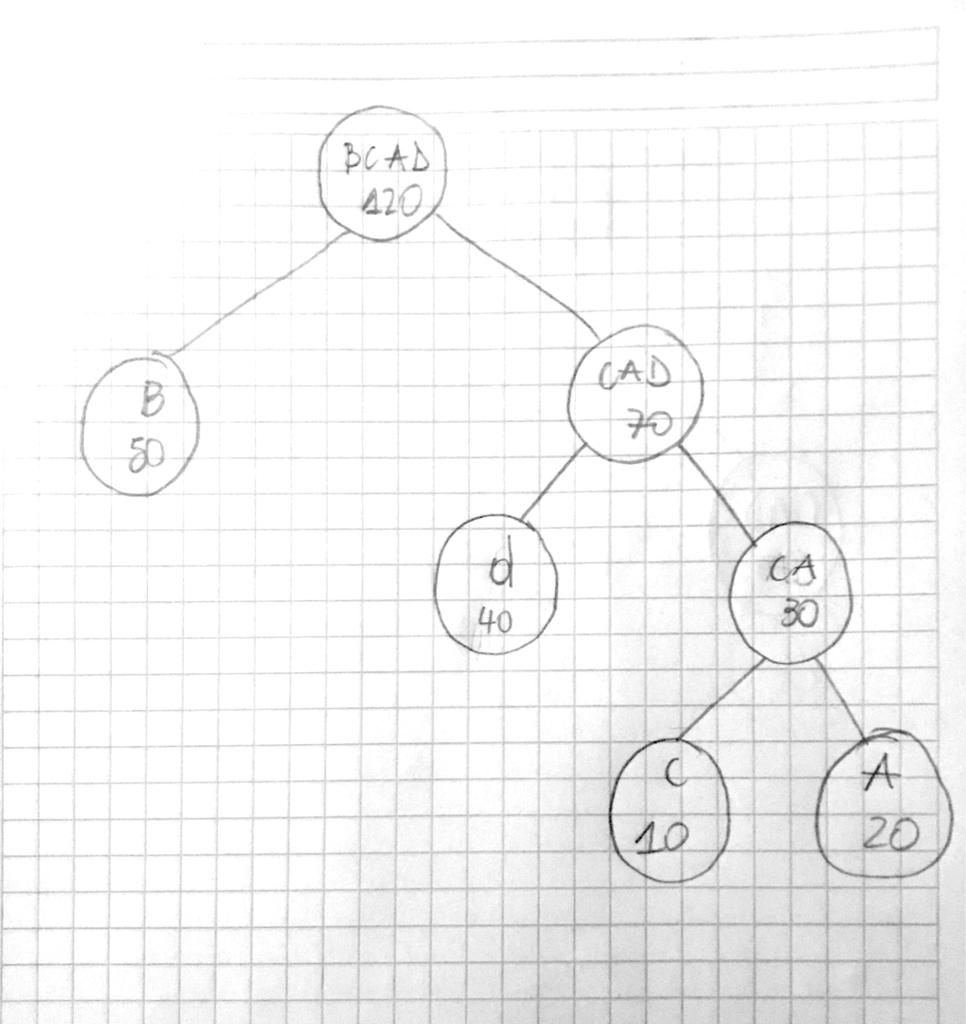


Ahora esta todo listo para otener un arból de cofificación, al hijo izquierdo se le asigna 0 y al hijo derecho 1, como en la siguiente imagen.

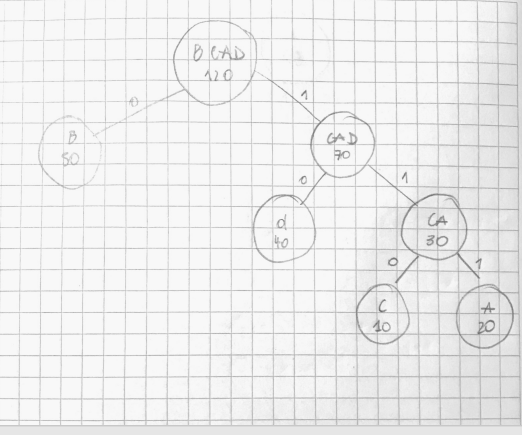


De esta forma podemos obtener nuestra codificación.
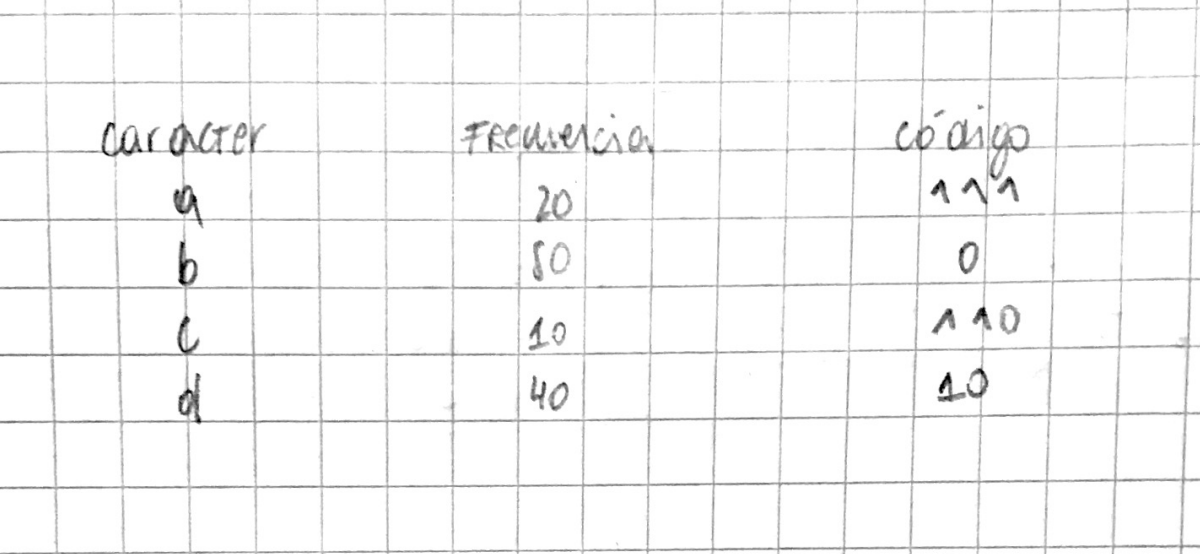


##**Código**

###Códigos auxiliares para realizar visualización del árbol generado

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

def visualize_tree(N):
  T = nx.DiGraph()
  labels = dict()

  for i in range(0,len(N)):
    labels[N[i].key] = str(N[i].key) + '\n' + str(N[i].priority)

    if N[i].parent == None:
      T.add_node(N[i].key, child_status='LEFT')
      root_key = N[i].key
      continue

    if N[i].parent.left == N[i]:
      T.add_node(N[i].key, child_status='LEFT')
      T.add_edge(N[i].parent.key, N[i].key, weight=0)
    else:
      T.add_node(N[i].key, child_status='RIGHT')
      T.add_edge(N[i].parent.key, N[i].key, weight=1)

  tree_pos = binary_tree_layout(T, root_key)
  nx.draw(T, tree_pos, with_labels=True, font_size=9.5, node_size=1200,
          node_color='white', edgecolors='black', labels=labels)
  
  edge_labels = nx.get_edge_attributes(T, 'weight')
  nx.draw_networkx_edge_labels(T, tree_pos, edge_labels, font_size=9.5,
                               rotate=False)

In [ ]:
def binary_tree_layout(G, root, width = 1., vert_gap = 0.2, vert_loc = 0, 
                       xcenter = 0.5, pos = None, parent = None):
  if pos == None:
    pos = {root:(xcenter, vert_loc)}
  else:
    pos[root] = (xcenter, vert_loc)

  neighbors = list(G.neighbors(root))
  
  if len(neighbors) != 0:

    dx = width/2.
    leftx = xcenter - dx/2
    rightx = xcenter + dx/2

    for neighbor in neighbors:
      if G.nodes[neighbor]['child_status'] == 'LEFT':
        pos = binary_tree_layout(G, neighbor, width = dx, vert_gap = vert_gap*1.15, 
                                 vert_loc = vert_loc-vert_gap, xcenter=leftx, 
                                 pos=pos, parent = root)
      
      elif G.nodes[neighbor]['child_status'] == 'RIGHT':
        pos = binary_tree_layout(G, neighbor, width = dx, vert_gap = vert_gap*1.15,
                                 vert_loc = vert_loc-vert_gap, xcenter=rightx,
                                 pos=pos, parent = root)
  return pos

In [ ]:
class Node:
  def __init__(self, key, priority):

    #Asigna clave y frecuencia a los nodos
    self.key = key
    self.priority = priority
    self.left = None
    self.right = None
    self.parent = None

def get_nodes(root):

  #Funcion para obtener la raiz
  if root == None: return []

  n_left = get_nodes(root.left)
  n_right = get_nodes(root.right)

  n = n_left + n_right
  n.append(root)

  return n

class Heap:
  #Se arma árbol binario de mínimos
  def __init__(self):
    self.A = list()
    self.size = 0

  def insert(self, node):
    if self.size == len(self.A): self.A.append(node)
    else: self.A[self.size] = node
    curr = self.size

    while True:  
      if curr == 0: break
      parent = (curr-1)//2

      if self.A[parent].priority > node.priority:
        curr = parent
      else: break

    self.A[self.size], self.A[curr] = self.A[curr], self.A[self.size]
    self.size += 1

  def pop(self):
    if self.size == 0: return

    node = self.A[0]
    self.A[0] = self.A[self.size-1]
    self.size -= 1
    curr = 0

    while True:
      left = curr*2+1
      right = curr*2+2
      aux = curr

      if left < self.size and self.A[left].priority < self.A[curr].priority:
        curr = left

      if right < self.size and self.A[right].priority < self.A[curr].priority:
        curr = right

      if curr == aux: break
      self.A[aux], self.A[curr] = self.A[curr], self.A[aux]

    return node

  def get_nodes(self):
    return self.A[:self.size]

##**Código Huffman**

In [ ]:
def huffman(F, visualize=False, verbose = False):
  heap = Heap()
  for key, value in F.items(): #Se insertan los nodos de la forma {clave : frecuencia} en el montículo
    node = Node(key, value)
    heap.insert(node)

  for i in range(heap.size-1):
    #Se eliminan los dos elementos menores del montículo
    x = heap.pop()  
    y = heap.pop()
    if verbose == True:
      print("\nNodos a eliminar\n")
      print("Nodo x: ", x.key, x.priority)
      print("Nodo y: ", y.key, y.priority)

    #Se crea un nuevo nodo z, padre de los nodos x e y, su frecuencia será la suma de las frecuencias de los nodos x e y, su clave la concatenación de estas
    z = Node(x.key + y.key, x.priority + y.priority)
    if verbose == True:
      print("Nuevo nodo padre z: ", z.key , z.priority)
    z.left = x  #Se le asignan sus hijos
    z.right = y
    x.parent = z #Se asigna el nodo z como nodo padre de x e y
    y.parent = z

    heap.insert(z)   #Se inserta el nuevo nodo z al montículo

  root = heap.pop()
  if visualize:
    visualize_tree(get_nodes(root))

  return root

frecuencias = {'A': 15 , 'B': 7 , 'C': 6, 'D': 6 , 'E': 5}
root = huffman(frecuencias, visualize=False, verbose = False)
print("Raiz del nodo, con su clave y frecuencia:",  root.key, root.priority)

Raiz del nodo, con su clave y frecuencia: AECDB 39


###**Opcion Visualize == True**

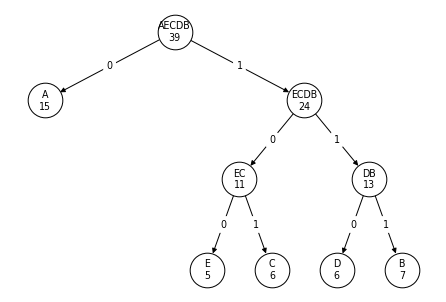

In [ ]:
frecuencias = {'A': 15 , 'B': 7 , 'C': 6, 'D': 6 , 'E': 5}
root = huffman(frecuencias, visualize=True, verbose = False)

##**Opción verbose == True**


Nodos a eliminar

Nodo x:  E 5
Nodo y:  C 6
Nuevo nodo padre z:  EC 11

Nodos a eliminar

Nodo x:  D 6
Nodo y:  B 7
Nuevo nodo padre z:  DB 13

Nodos a eliminar

Nodo x:  EC 11
Nodo y:  DB 13
Nuevo nodo padre z:  ECDB 24

Nodos a eliminar

Nodo x:  A 15
Nodo y:  ECDB 24
Nuevo nodo padre z:  AECDB 39


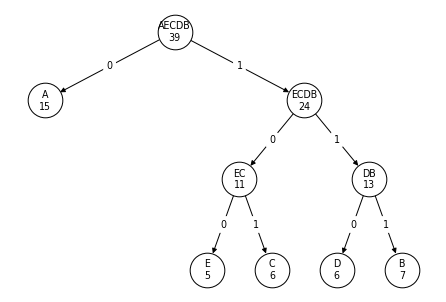

In [ ]:

frecuencias = {'A': 15 , 'B': 7 , 'C': 6, 'D': 6 , 'E': 5}

root = huffman(frecuencias, visualize=True, verbose = True)

##**Propiedades del algoritmo**
En esta sección del informe explicaremos dos propiedades del algoritmo Huffman, su correctitud y tiempo de ejecución.

###**Correctitud**
A continuación probaremos que el algoritmo es correcto para todo caso.

**Teorema 1**

"*El algoritmo de Huffman construye un árbol óptimo, donde x e y son los nodos con menor frecuencia y están en la máxima profundidad del árbol*"

Para calcular la cantidad de bits del string que se desea codificar se calculara con la siguiente sumatoria.

$B(T) =  \sum\limits_i p_i \cdot d_T(i)$  ;

$nodos$ $i$ : Hojas del árbol de decodificación

$p_i$: Frecuencia del caracter

$d_i$: Profundidad del nodo.

Probaremos esto a traves de intercambio de argumentos, despues probaremos que el código de Huffman es óptimo por metodo de inducción.

**Teorema 2**

"*La codificación de Huffman entrega un árbol de prefijos de costo óptimo*"

**Prueba del teorema:**

**Caso base $( n = 2 )$**: De forma trivial diremos que el árbol es del costo más óptimo, dado que solo habra un árbol binario con dos hojas.

**Paso inductivo:** Asumiremos que el teorema es correcto para cualquier secuencia de $n-1$ frecuencias y probaremos que la correctitud se mantiene para cualquier secuencia de n frecuencias.

Digamos que $f_1$**, ...**$f_n$, sera cualquier secuencia de n frecuencias. Asumimos que $f_1<f_2<f_3,...f_n$. Basandonos en el teorema 1 **existe un óptimo árbol binario T**, en el cual las hojas marcadas con 1 y 2 son hermanas. Ahora digamos que el árbol que entrega la codificación de Huffman se llamará H,  no estamos diciendo que **T = H**, pero ambos tienen el mismo costo. 

Ahora eliminaremos del árbol T los dos nodos marcados con 1 y 2 y crearemos su nuevo nodo padre z con frecuencia $f_1$ **+** $f_2$. Tenemos ahora un nuevo árbol binario **T'** con n - 1 hojas con frecuencias $f_1+f_2+f_3...+f_n$.   Hacemos el mismo procedimiento pero con el árbol de Huffman, obteniendo un árbol **H'** con n - 1 hojas con frecuencias $f_1+f_2+f_3...+f_n$
. Podemos notar H' es igual en frecuencias al árbol. Por la hipotesis inductiva tenemos que:

$costo(H')$ = $costo(T')$

Si obsevamos en más profundidad tenemos que:

$costo(T')$ = $costo(T)$ - ($f_1 + f_2$)

Para obtener T' de T tuvimos que sacar dos nodos con frecuencias $f_1$ y $f_2$ a una profundidad $d$, con un nodo con frecuencia $f_1 + f_2$ a una profundidad $d -1$, esto baja el costo por $f_1 + f_2$, de igual forma entonces:


$costo(H')$ = $costo(H)$ - ($f_1 + f_2$)

Combinando las ecuaciones obtenemos:

$cost(H) = cost(H′) + f1 + f2 = cost(T′) + f1 + f2 = cost(T)$



###**Tiempo de ejecución**
A continuacion analizaremos el tiempo de ejecucion de la codificación de Huffman, para obtener el tiempo de ejecución total del algoritmo, veremos cuanto tiempo toma en ejecutarse cada parte del algoritmo y finalmente calcularemos el total.

**Insertar nodos al montículo**

Se insertaran $n$ nodos y cada inserción tomo un tiempo de $log(n)$, obteniendo un tiempo de $O(n \cdot  log(n))$

**Eliminar elementos del monticulo**

Se realizan $2n-2$ eliminacion de nodos, donde cada una de ellas toma un tiempo $log(n)$, obteniendo un tiempo de  $O(n \cdot  log(n))$

**Insertar nodo padre en el montículo**

Se inserta un nodo padre en el montículo $n-1$ veces, cada inserción toma un tiempo de $log(n)$, obteniendo un tiempo de $O(n \cdot  log(n))$

Como pudimos ver, todos los procesos del algoritmo toman tiempo $O(n \cdot  log(n))$, por ende el tiempo total del algoritmo es: $O(n \cdot  log(n))$

Es importante mencionar que para este algoritmo "no existe mejor y peor caso", dado que no influye la frecuencia que tengan u otro motivo que nos diera un posible mejor o peor caso.

##**Experimentos**
A continuación veremos un experimentos donde analizamos un "peor caso teorico" y el caso promedio, y compararemos sus tiempos de ejecución. Los parametros entregados al algoritmo son generados con el código "huffman_instance_generator".

In [27]:
import numpy as np

def huffman_instance_generator(n):
  arr1 = np.random.random(n)
  arr1 /= arr1.sum()
  arr2 = arr1.copy()
  arr2 /= 2
    
  f1 = dict(); f2 = dict()
  for i in range(n):
    f1[i] = arr1[i]
    f2[i] = arr2[i]

  return f1,f2

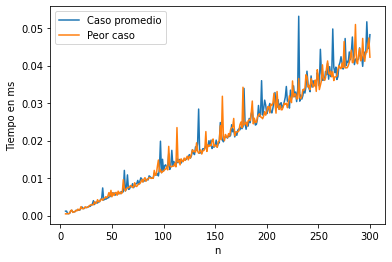

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x=[]; y1=[]; y2=[]

for n in range(5,301):
  f1, f2 = huffman_instance_generator(n)

  t1 = repeat(setup="from __main__ import huffman", stmt=f"huffman({f1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import huffman", stmt=f"huffman({f2})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Caso promedio", "Peor caso"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

##**Analisis de resultados**

Como podemos observar en la gráfica, confirmamos lo propuesto en la seccion de tiempo de ejecución, no existe un peor caso para este algorimo, toman el mismo tiempo de ejecución, podemos ver que la gráfica tiene un comportamiento logaritmico, alcanzando los 0.05 ms cuando son 300 nodos a trabajar.